# Recurrent Neural Network

RNN is a for loop that reuses quantities computed during the previous iteration of the loop, so the network has memory.

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM

In [0]:
max_features = 10000 # Number of words to consider as features
maxlen = 500 # Cut off texts after this many words (among the max_features most common words)

In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [29]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [33]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [35]:
# network architecture
model = Sequential()

# Specifiy the maximun input length to the embedding layer
# activiations have shape (samples, maxlen, 8)
model.add(Embedding(max_features, 32))

# add a RNN layer
model.add(SimpleRNN(32)) 

# fully connected layer with a sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6510 - acc: 0.6048 - val_loss: 0.4849 - val_acc: 0.7926
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4467 - acc: 0.8027 - val_loss: 0.4256 - val_acc: 0.8064
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3308 - acc: 0.8650 - val_loss: 0.3800 - val_acc: 0.8382
Epoch 4/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.2599 - acc: 0.8985 - val_loss: 0.3861 - val_acc: 0.8486
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1879 - acc: 0.9312 - val_loss: 0.3559 - val_acc: 0.8740
Epoch 6/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1366 - acc: 0.9516 - val_loss: 0.3705 - val_acc: 0.8584
Epoch 7/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.0938 - acc: 0.9704 - val_loss: 0.4501 - val_acc:

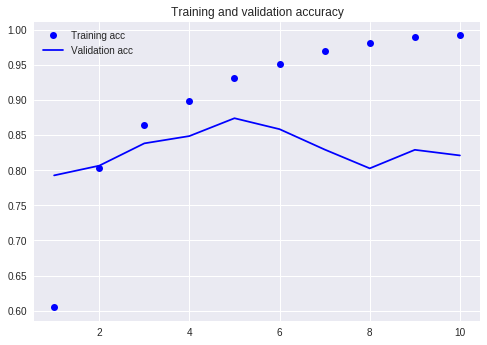

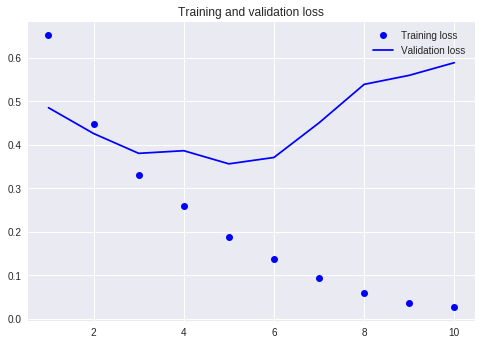

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Problems of Simple RNN -- Vanishing Gradient

Theoretically, SimpleRNN can retain information about inputs that have been seen many timesteps before. From a practical perspective, however, it's impossible for it to learn long-term dependencies, which is also know the <b>vanishing gradient problem</b>.

Similar to other non-recurrent networks (a.k.a feedforward networks), the Simple RNN tends to be untrainable if you keep adding layers. LSTM and GRU are designed to solve this problem. 

In short, LSTM allows past information to be reinjected at a later time, thus fighting the vanishing-gradient problem.

In [41]:
model= Sequential()
model.add(Embedding(max_features, 32)) # max_features: Number of words to consider as features
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.5074 - acc: 0.7637 - val_loss: 0.3266 - val_acc: 0.8718
Epoch 2/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.2901 - acc: 0.8855 - val_loss: 0.4416 - val_acc: 0.7832
Epoch 3/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.2349 - acc: 0.9086 - val_loss: 0.3750 - val_acc: 0.8738
Epoch 4/10
20000/20000 [==============================] - 130s 6ms/step - loss: 0.1942 - acc: 0.9280 - val_loss: 0.4569 - val_acc: 0.8584
Epoch 5/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.1757 - acc: 0.9358 - val_loss: 0.2883 - val_acc: 0.8774
Epoch 6/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.1545 - acc: 0.9444 - val_loss: 0.3339 - val_acc: 0.8822
Epoch 7/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.1388 - acc: 0.9496 - val_loss: 0.7682 - v

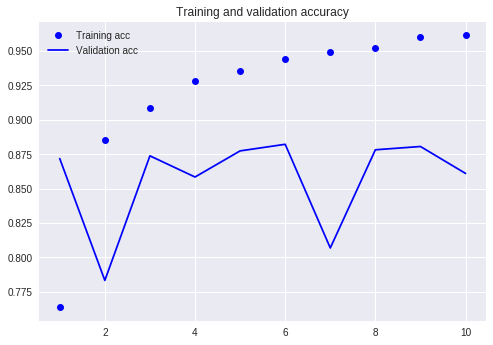

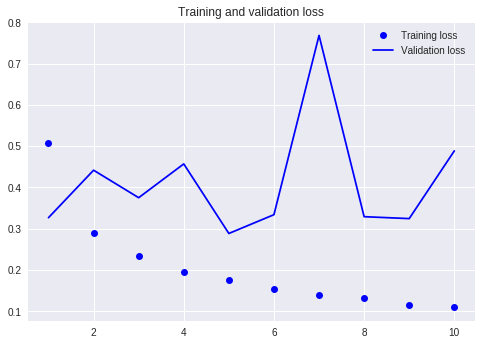

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()